In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import numpy as np

train_data=np.load('/content/drive/MyDrive/Colab Projects/Emotion Detection Using CNN/train_data.npy')
train_target=np.load('/content/drive/MyDrive/Colab Projects/Emotion Detection Using CNN/train_target.npy')

test_data=np.load('/content/drive/MyDrive/Colab Projects/Emotion Detection Using CNN/test_data.npy')
test_target=np.load('/content/drive/MyDrive/Colab Projects/Emotion Detection Using CNN/test_target.npy')


In [38]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,BatchNormalization
from keras.optimizers import Adam

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=train_data.shape[1:],kernel_initializer='orthogonal'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3, 3), activation='relu',kernel_initializer='orthogonal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer='orthogonal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer='orthogonal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 44, 44, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                      

In [40]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                         horizontal_flip=True,fill_mode="nearest")

In [41]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Projects/Emotion Detection Using CNN/emotion_weights-{epoch:03d}.h5',monitor='val_loss',save_best_only=True,mode='auto')

In [42]:
bs=32

history=model.fit(aug.flow(train_data,train_target,batch_size=bs),
                  validation_data=(test_data,test_target),epochs=100,callbacks=[checkpoint])

Epoch 1/100
898/898 [==============================] - 20s 21ms/step - loss: 1.9942 - accuracy: 0.2470 - val_loss: 1.7520 - val_accuracy: 0.3377
Epoch 2/100
898/898 [==============================] - 18s 20ms/step - loss: 1.7381 - accuracy: 0.2898 - val_loss: 1.6512 - val_accuracy: 0.3371
Epoch 3/100
898/898 [==============================] - 18s 20ms/step - loss: 1.6698 - accuracy: 0.3307 - val_loss: 1.5038 - val_accuracy: 0.4168
Epoch 4/100
898/898 [==============================] - 18s 20ms/step - loss: 1.5939 - accuracy: 0.3713 - val_loss: 1.4969 - val_accuracy: 0.4393
Epoch 5/100
898/898 [==============================] - 18s 20ms/step - loss: 1.5351 - accuracy: 0.3957 - val_loss: 1.3503 - val_accuracy: 0.4848
Epoch 6/100
898/898 [==============================] - 18s 21ms/step - loss: 1.4967 - accuracy: 0.4193 - val_loss: 1.2806 - val_accuracy: 0.5128
Epoch 7/100
898/898 [==============================] - 19s 21ms/step - loss: 1.4648 - accuracy: 0.4341 - val_loss: 1.3690 - val_ac

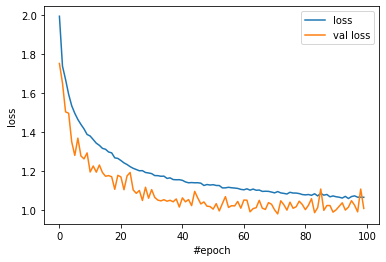

In [43]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.show()


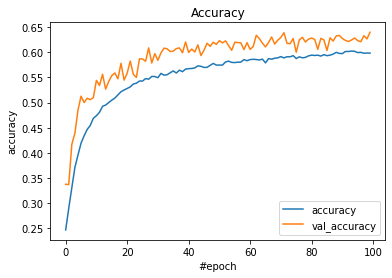

In [47]:
plt.title("Accuracy")
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.xlabel('#epoch')
plt.ylabel('accuracy')
plt.show()

In [48]:
print(model.evaluate(test_data,test_target))

225/225 [==============================] - 1s 5ms/step - loss: 1.0087 - accuracy: 0.6399
[1.008735179901123, 0.6398718357086182]


In [49]:
predicted_target=model.predict(test_data)

225/225 [==============================] - 1s 3ms/step


In [51]:
model.save_weights('/content/drive/MyDrive/Colab Projects/Emotion Detection Using CNN/emotion_weights.h5')